In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
# Load the os library
import os

# Load the request module
import urllib.request

# Import SSL which we need to setup for talking to the HTTPS server
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Create a directory
try: 
    os.mkdir('img_align_celeba')

    # Now perform the following 100 times:
    for img_i in range(1, 101):

        # create a string using the current loop counter
        f = '000%03d.jpg' % img_i

        # and get the url with that string appended the end
        url = 'https://s3.amazonaws.com/cadl/celeb-align/' + f

        # We'll print this out to the console so we can see how far we've gone
        print(url, end='\r')

        # And now download the url to a location inside our new directory
        urllib.request.urlretrieve(url, os.path.join('img_align_celeba', f))
except:
    #os.rm('img_align_celeba')
    print("You may need to delete the existing 'img_align_celeba' folder in your directory")

You may need to delete the existing 'img_align_celeba' folder in your directory


In [4]:
files = os.listdir('img_align_celeba')# img.<tab> # 获取所有的文件名称
import matplotlib.pyplot as plt
import numpy as np

print(os.path.join('img_align_celeba', files[0]))
plt.imread(os.path.join('img_align_celeba', files[0]))

files = [os.path.join('img_align_celeba', file_i)
 for file_i in os.listdir('img_align_celeba')
 if '.jpg' in file_i]

# There should be 100 files, with the last one being number 99

img = plt.imread(files[99])

print(img)

img_align_celeba\000001.jpg
[[[53 53 63]
  [59 58 63]
  [52 44 42]
  ...
  [31 28 35]
  [32 29 36]
  [32 29 36]]

 [[53 53 63]
  [58 57 63]
  [53 45 43]
  ...
  [31 28 35]
  [32 29 36]
  [32 29 36]]

 [[54 54 66]
  [57 56 62]
  [54 46 44]
  ...
  [31 28 35]
  [32 29 36]
  [32 29 36]]

 ...

 [[53 51 62]
  [53 51 62]
  [53 51 62]
  ...
  [35 33 38]
  [35 33 38]
  [35 33 38]]

 [[52 50 61]
  [53 51 62]
  [53 51 62]
  ...
  [35 33 38]
  [34 32 37]
  [34 32 37]]

 [[52 50 61]
  [53 51 62]
  [53 51 62]
  ...
  [35 33 38]
  [34 32 37]
  [34 32 37]]]


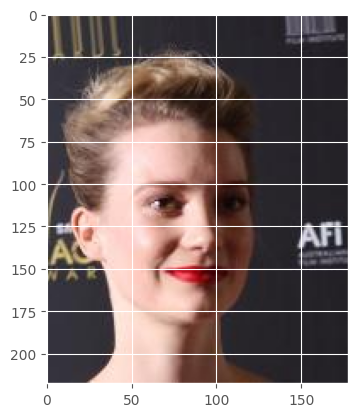

In [5]:
# 显示原始图片
plt.imshow(img)

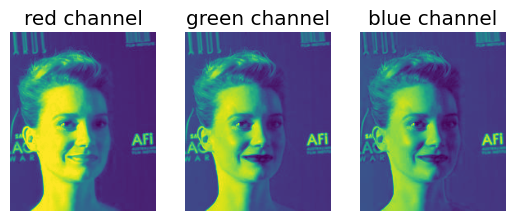

In [6]:
titles = ['red', 'green', 'blue']
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(img[:, :, i])
    plt.title(titles[i] + ' channel')
    plt.axis('off')

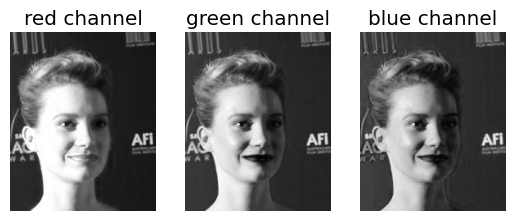

In [7]:
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(img[:, :, i],cmap='gray')
    plt.title(titles[i] + ' channel')
    plt.axis('off')

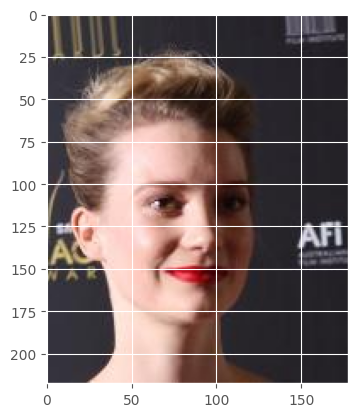

In [8]:
imgs = [plt.imread(files[file_i])
        for file_i in range(100)]
plt.imshow(imgs[99])

查看图片文件的格式

In [9]:
imgs[0].shape

(218, 178, 3)

In [10]:
data = np.array(imgs) # make 'data' = our numpy array
data.shape
print(data.shape)
print("The shape of our new 'data' object is a 'batch' of 100 images, with a height of 218, width of 178, and 3 colour channels")
print("If your images aren't all the same size to begin with, then this won't work!")

(100, 218, 178, 3)
The shape of our new 'data' object is a 'batch' of 100 images, with a height of 218, width of 178, and 3 colour channels
If your images aren't all the same size to begin with, then this won't work!


look at this average person


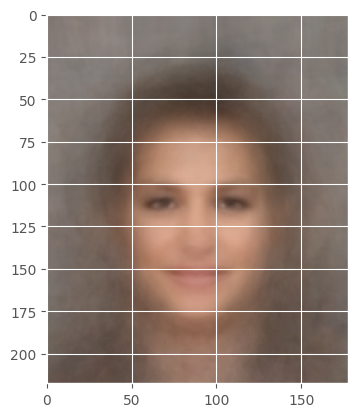

In [11]:
mean_img = np.mean(data, axis=0) # This is the mean of the 'batch' channel
plt.imshow(mean_img.astype(np.uint8))
print("look at this average person")

This is the standard deviation - the variance of the mean


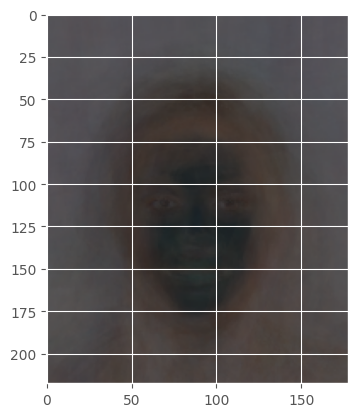

In [12]:
std_img = np.std(data, axis=0)
plt.imshow(std_img.astype(np.uint8))
print("This is the standard deviation - the variance of the mean")

Mean of all colour channels


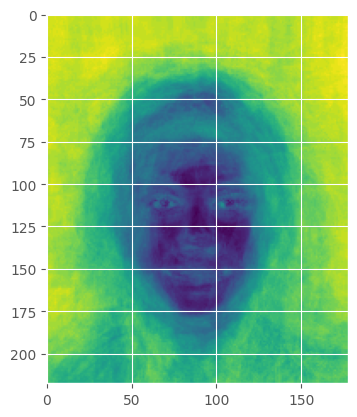

In [13]:
plt.imshow(np.mean(std_img, axis=2).astype(np.uint8)) # Mean of all colour channels
print("Mean of all colour channels")

In [14]:
flattened = data.ravel()
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html
print(data[:1])
print(flattened[:10])

[[[[253 231 194]
   [253 231 194]
   [253 231 194]
   ...
   [246 228 216]
   [255 237 223]
   [254 238 222]]

  [[253 231 194]
   [253 231 194]
   [253 231 194]
   ...
   [248 230 218]
   [255 237 223]
   [254 238 222]]

  [[253 231 194]
   [253 231 194]
   [253 231 194]
   ...
   [250 232 220]
   [255 238 224]
   [255 239 223]]

  ...

  [[140  74  26]
   [115  49   1]
   [146  78  33]
   ...
   [122  55  28]
   [123  56  30]
   [122  56  30]]

  [[130  62  15]
   [138  70  23]
   [166  98  53]
   ...
   [118  49  20]
   [120  50  24]
   [118  51  24]]

  [[168 100  53]
   [204 136  89]
   [245 177 132]
   ...
   [118  49  20]
   [120  50  24]
   [120  50  24]]]]
[253 231 194 253 231 194 253 231 194 253]


(array([215683., 118606.,  99471.,  71712.,  66626.,  61991.,  62341.,
         58347.,  56752.,  56250.,  56680.,  58598.,  62867.,  60671.,
         59112.,  59377.,  62375.,  63608.,  62202.,  64642.,  63383.,
         62096.,  61002.,  60649.,  60699.,  60159.,  59116.,  59356.,
         60410.,  64301.,  67406.,  61663.,  59823.,  60528.,  62080.,
         62145.,  62885.,  62685.,  62504.,  62364.,  59522.,  58812.,
         57883.,  61380.,  63337.,  57662.,  57147.,  56385.,  56111.,
         58100.,  56285.,  55019.,  54652.,  52441.,  50963.,  48996.,
         47700.,  45935.,  45386.,  43596.,  42975.,  42894.,  42317.,
         42217.,  42185.,  42588.,  43190.,  43020.,  43251.,  43271.,
         43194.,  43061.,  42159.,  42320.,  41874.,  41863.,  42906.,
         42433.,  42506.,  42391.,  42675.,  42548.,  42545.,  42574.,
         42698.,  42118.,  42144.,  41540.,  41467.,  41327.,  41814.,
         42526.,  41651.,  42794.,  41994.,  42435.,  42802.,  43548.,
      

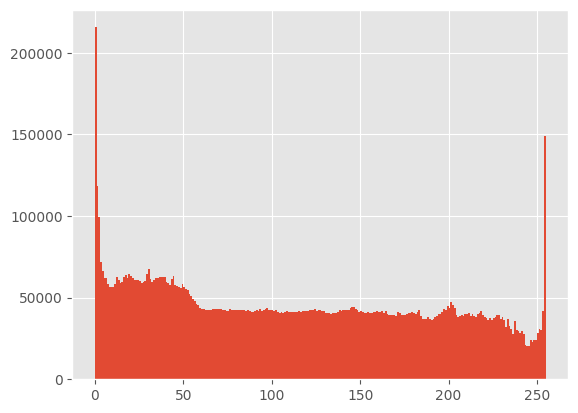

In [15]:
# 查看全部像素点的值统计
plt.hist(flattened.ravel(), 255)

(array([   2.,    0.,    0.,    0.,    0.,    9.,   25.,   29.,   32.,
          44.,   46.,   39.,   48.,   58.,   30.,   39.,   63.,   50.,
          65.,   63.,   74.,   78.,   89.,  111.,  101.,  121.,  103.,
         116.,   99.,  155.,  173.,  210.,  231.,  212.,  286.,  305.,
         326.,  352.,  333.,  382.,  399.,  383.,  388.,  454.,  531.,
         569.,  655.,  662.,  720.,  791.,  838.,  851.,  897.,  935.,
         863.,  850.,  815.,  821.,  818.,  849.,  932.,  849.,  855.,
         836.,  897.,  884.,  858.,  837.,  917.,  922.,  918.,  924.,
         936.,  964., 1009., 1054., 1082., 1113., 1163., 1119., 1124.,
        1096., 1094., 1089., 1086., 1110., 1072., 1111., 1135., 1186.,
        1131., 1204., 1171., 1180., 1237., 1235., 1171., 1217., 1174.,
        1167., 1244., 1314., 1353., 1483., 1485., 1555., 1594., 1487.,
        1516., 1482., 1501., 1619., 1691., 1571., 1553., 1542., 1606.,
        1438., 1317., 1164., 1207., 1115., 1048., 1061., 1012., 1063.,
      

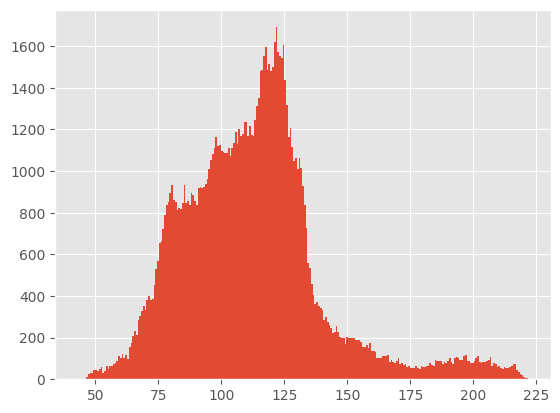

In [16]:
# 查看数据集的平均图像的值统计
plt.hist(mean_img.ravel(), 255)


### 对整个数据集进行归一化

Text(0.5, 1.0, '(img - mean) / std')

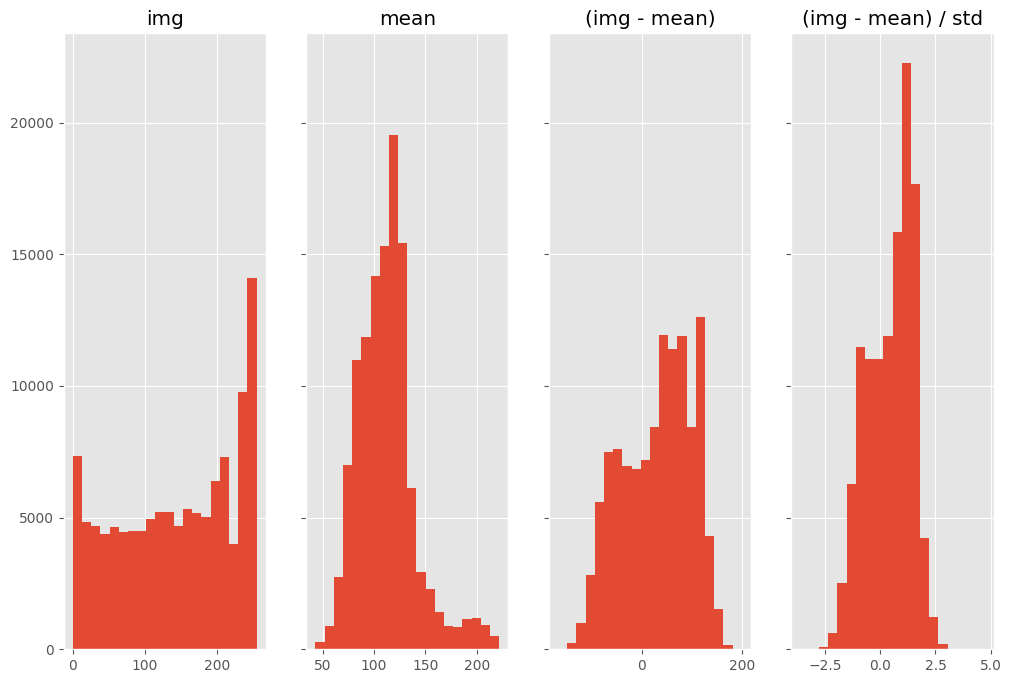

In [17]:
bins = 20
fig, axs = plt.subplots(1, 4, figsize=(12, 8), sharey=True, sharex=False)
axs[0].hist((data[0]).ravel(), bins)
axs[0].set_title('img')
axs[1].hist((mean_img).ravel(), bins)
axs[1].set_title('mean')
axs[2].hist((data[0] - mean_img).ravel(), bins)
axs[2].set_title('(img - mean)')
axs[3].hist(((data[0] - mean_img) / std_img).ravel(), bins)
axs[3].set_title('(img - mean) / std')

### 男女图片差异

In [18]:
men = [3,7,8,12,13,15,16,20,21,23,25,30,32,33,36,37,
       38,41,48,49,50,51,52,53,55,60,61,64,65,68,69,
       70,72,76,79,80,81,82,90,91]
women = [i for i in list(range(1, 101)) if i not in men]
len(men),len(women)

(40, 60)

In [19]:
# 按照list加载图片
def load_picts(li:list):
    images = []
    for idx in li:
        image_name = "000%03d.jpg" % idx
        image = plt.imread(os.path.join("img_align_celeba", image_name))
        images.append(image)
    return images

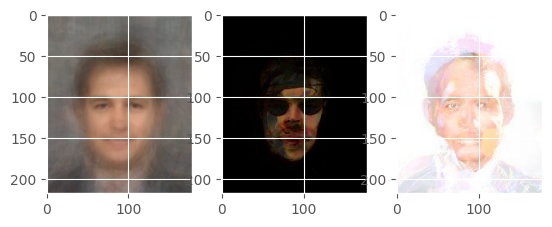

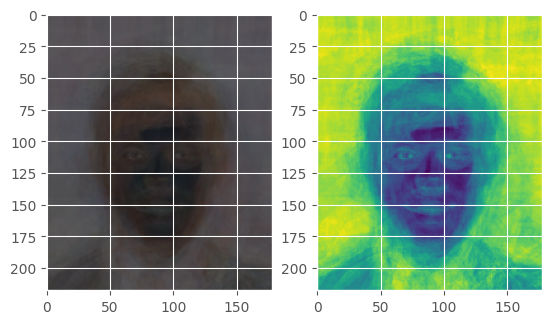

In [20]:
# 对男性的进行分析
men_picts = np.array(load_picts(men))
# men_mean = np.mean(men_picts, axis=0)
# plt.imshow(men_mean.astype(np.uint8))

men_img_mean = np.mean(men_picts, axis=0)
men_img_min = np.min(men_picts, axis=0)
men_img_max = np.max(men_picts, axis=0)
men_img_std = np.std(men_picts, axis=0)
men_img_std_chan = np.mean(men_img_std, axis=2)

fig, axs = plt.subplots(1, 3)
axs[0].imshow(men_img_mean.astype(np.uint8))
axs[1].imshow(men_img_min.astype(np.uint8))
axs[2].imshow(men_img_max.astype(np.uint8))

fig, axs = plt.subplots(1, 2)
axs[0].imshow(men_img_std.astype(np.uint8))
axs[1].imshow(men_img_std_chan.astype(np.uint8))

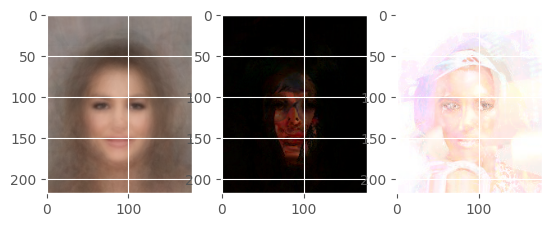

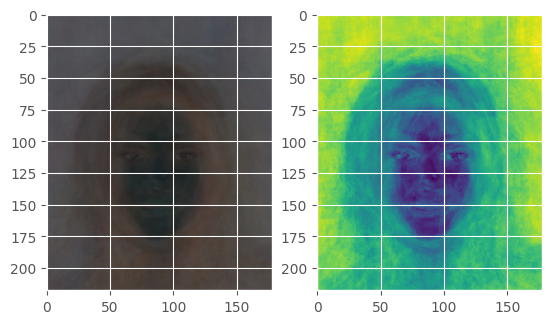

In [21]:
# 对女性的进行分析
women_picts = np.array(load_picts(women))

women_img_mean = np.mean(women_picts, axis=0)
women_img_min = np.min(women_picts, axis=0)
women_img_max = np.max(women_picts, axis=0)
women_img_std = np.std(women_picts, axis=0)
women_img_std_chan = np.mean(women_img_std, axis=2)

fig, axs = plt.subplots(1, 3)
axs[0].imshow(women_img_mean.astype(np.uint8))
axs[1].imshow(women_img_min.astype(np.uint8))
axs[2].imshow(women_img_max.astype(np.uint8))

fig, axs = plt.subplots(1, 2)
axs[0].imshow(women_img_std.astype(np.uint8))
axs[1].imshow(women_img_std_chan.astype(np.uint8))

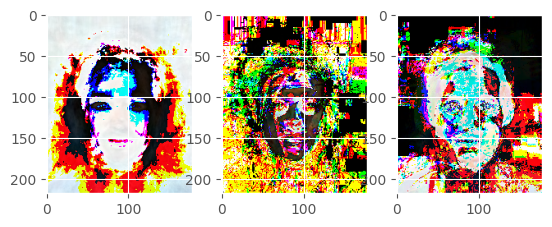

In [22]:
# 计算两者之间的差值
diff_img_mean = men_img_mean - women_img_mean
diff_img_min = men_img_min - women_img_min
diff_img_max = men_img_max - women_img_max

fig, axs = plt.subplots(1, 3)
axs[0].imshow(diff_img_mean.astype(np.uint8))
axs[1].imshow(diff_img_min.astype(np.uint8))
axs[2].imshow(diff_img_max.astype(np.uint8))

Text(0.5, 1.0, 'noise')

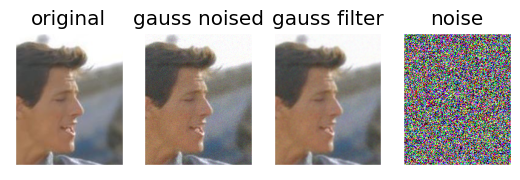

In [23]:
import cv2
def clear_ax(ax):
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
# 图片进行高斯滤波处理,进行部分降噪
def gauss_filter(pict):
    #设置高斯分布的均值和方差
    mean = 0
    #设置高斯分布的标准差
    sigma = 9
    #根据均值和标准差生成符合高斯分布的噪声
    gauss = np.random.normal(mean,sigma,pict.shape)
    #给图片添加高斯噪声
    noisy_img = pict + gauss
    #设置图片添加高斯噪声之后的像素值的范围
    noisy_img = np.clip(noisy_img,a_min=0,a_max=255)
    kernel = np.array([[1/16, 2/16, 1/16],
                   [2/16, 4/16, 2/16],
                   [1/16, 2/16, 1/16]], np.float32)
    filtered = cv2.filter2D(noisy_img,-1,kernel=kernel)
    return gauss, noisy_img, filtered
test_pict = men_picts[0]
fig, axs = plt.subplots(1, 4)
for i in range(4):
    clear_ax(axs[i])
noise, noised_pict, filtered = gauss_filter(test_pict)
axs[0].imshow(test_pict.astype(np.uint8))
axs[0].set_title('original')
axs[1].imshow(noised_pict.astype(np.uint8))
axs[1].set_title('gauss noised')
axs[2].imshow(filtered.astype(np.uint8))
axs[2].set_title('gauss filter')
axs[3].imshow(noise.astype(np.uint8))
axs[3].set_title('noise')
# plt.savefig("")

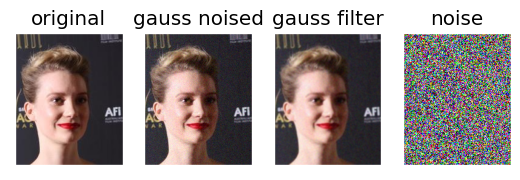

In [28]:
# 对所有图片进行高斯过滤降噪
imgs = load_picts(range(1 ,101))
fig, axs = plt.subplots(1, 4)
for i in range(4):
    clear_ax(axs[i])

cnt=1
for img in imgs:
    noise, noised_pict, filted = gauss_filter(img)
    noise, noised_pict, filtered = gauss_filter(img)
    axs[0].imshow(img.astype(np.uint8))
    axs[0].set_title('original')
    axs[1].imshow(noised_pict.astype(np.uint8))
    axs[1].set_title('gauss noised')
    axs[2].imshow(filtered.astype(np.uint8))
    axs[2].set_title('gauss filter')
    axs[3].imshow(noise.astype(np.uint8))
    axs[3].set_title('noise')
    plt.savefig('./gauss/000%03d.jpg'%cnt)
    cnt += 1